In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import h5py
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
import phenom

In [4]:
import shutil

In [5]:
import os
import glob

In [6]:
import numpy as np

In [7]:
from positive.physics import cw181003550
%matplotlib inline
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

(positive)>> Applying custom matplotlib settings.


# try their ansatz

In [8]:
import phenom
def get_remnant(eta, ell, mm, chi1z=0, chi2z=0):
    fin_spin = phenom.remnant.FinalSpin0815(eta, chi1z, chi2z)
    final_mass = 1.0 - phenom.EradRational0815(eta, chi1z, chi2z)
    
    complex_rd = cw181003550(fin_spin, ell, mm, 0)
    omega_rd = np.real(complex_rd) / final_mass
    tdamp_rd = np.imag(complex_rd) / final_mass
    
    return omega_rd, 1./tdamp_rd

In [9]:
om_rd, tau_rd = get_remnant(0.25, 2, 2)
print(om_rd, tau_rd)

0.5536032718540641 11.714214689922516


# load data 

In [10]:
datafile="/Users/spx8sk/Downloads/asymmetry_data.dat"

In [11]:
x,y = np.loadtxt(datafile, unpack=True)

In [12]:
peak_index = np.argmax(y)

In [13]:
peak_time = x[peak_index]

In [14]:
early_end = 1520 - peak_time

In [15]:
peak_time-10

1764.175

In [16]:
x = x - peak_time

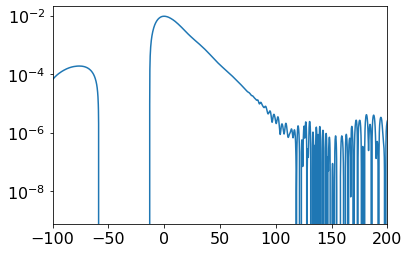

In [17]:
plt.figure()
plt.plot(x, y)
# plt.xlim(-300,200)
plt.xlim(-100,200)
# plt.axvline(early_end, c='k')
plt.yscale('log')

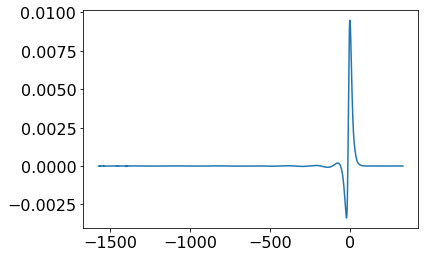

In [18]:
plt.figure()
plt.plot(x, y)
# plt.ylim(-1e-4, 1e-4)
# plt.xlim(-1000, -10)
# plt.axvline(early_end, c='k')

(-1000, -10)

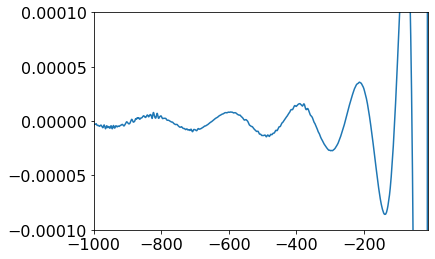

In [19]:
plt.figure()
plt.plot(x, y)
plt.ylim(-1e-4, 1e-4)
plt.xlim(-1000, -10)
# plt.axvline(early_end, c='k')

In [20]:
import lmfit
import corner

In [194]:
def ansatz(x, A, x0, tau):
    return A * np.exp(-(x-x0)/tau)

In [195]:
# data to fit
t1 = 10
t2 = 60

mask = (x>=t1) & (x<=t2)
x_fit3 = x[mask]
y_fit3 = y[mask]

model = lmfit.Model(ansatz)

model.set_param_hint('A', value=0.1)
model.set_param_hint('x0', value=0.3)
model.set_param_hint('tau', value=tau_rd, vary=True)

p = model.make_params()

In [196]:
result3 = model.fit(data=y_fit3, x=x_fit3, params=p, method='Nelder')

/Users/spx8sk/anaconda3/envs/wispy-dev/lib/python3.7/site-packages/lmfit/minimizer.py:779: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/Users/spx8sk/anaconda3/envs/wispy-dev/lib/python3.7/site-packages/lmfit/minimizer.py:786: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))


In [197]:
lmfit.report_fit(result3)

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 207
    # data points      = 347
    # variables        = 3
    chi-square         = 2.4542e-07
    reduced chi-square = 7.1343e-10
    Akaike info crit   = -7305.15759
    Bayesian info crit = -7293.60962
##  Warning: uncertainties could not be estimated:
[[Variables]]
    A:    0.01409163 +/-        nan (nan%) (init = 0.1)
    x0:   0.51970418 +/-        nan (nan%) (init = 0.3)
    tau:  11.7989334 +/- 0.01577747 (0.13%) (init = 11.71421)


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

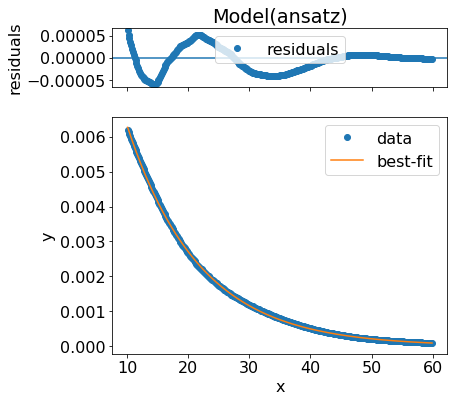

In [198]:
result3.plot()

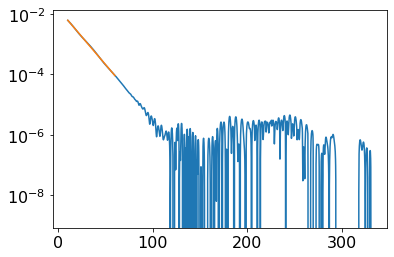

In [199]:
plt.figure()

plt.plot(x[x>10], y[x>10])
plt.plot(x_fit3, result3.eval(params=result3.params, x=x_fit3))
plt.yscale('log')

In [96]:
def ansatz_peak(x, A, x0, tau, a1, a2, x1):
    sech = 1./np.cosh((x-x0)/tau) * A
    return sech**2 + a1*np.exp(-(x-x1)/a2)

In [180]:
# data to fit
t1 = -10
t2 = 20

mask = (x>=t1) & (x<=t2)
x_fit = x[mask]
y_fit = y[mask]

model = lmfit.Model(ansatz_peak)

model.set_param_hint('A', value=0.1)
model.set_param_hint('x0', value=0.3)
model.set_param_hint('tau', value=tau_rd, vary=True)

model.set_param_hint('a1', value=1)
model.set_param_hint('a2', value=tau_rd, vary=False)
model.set_param_hint('x1', value=0., vary=False)

p = model.make_params()

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 208
    # variables        = 4
    chi-square         = 4.6394e-07
    reduced chi-square = 2.2742e-09
    Akaike info crit   = -4135.57650
    Bayesian info crit = -4122.22635
[[Variables]]
    A:    0.12216168 +/- 3.8300e-04 (0.31%) (init = 0.1)
    x0:  -4.54382876 +/- 0.08267907 (1.82%) (init = 0.3)
    tau:  17.9200450 +/- 0.04970681 (0.28%) (init = 11.71421)
    a1:  -0.00457587 +/- 6.0095e-05 (1.31%) (init = 1)
    a2:   11.71421 (fixed)
    x1:   0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, a1)   = -0.998
    C(x0, a1)  =  0.983
    C(A, x0)   = -0.983
    C(x0, tau) = -0.961
    C(tau, a1) = -0.917
    C(A, tau)  =  0.911


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

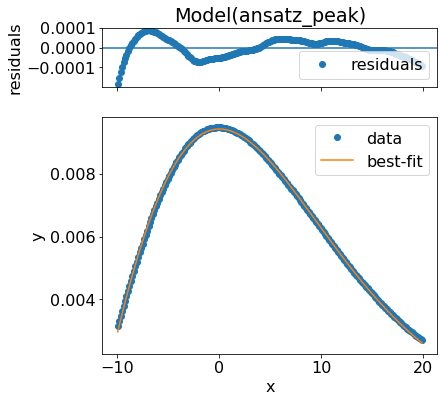

In [181]:
# result = model.fit(data=y_fit, x=x_fit, params=p, method='Nelder', nan_policy='omit')
result = model.fit(data=y_fit, x=x_fit, params=p, method='least_squares', nan_policy='omit')
lmfit.report_fit(result)
result.plot()

# pre -10M again

In [182]:
def ansatz_peak_pre_10(x, A, x0, tau, a1, a2, x1, b0):
    x = -x.copy()
    sech = 1./np.cosh((x-x0)/tau) * A
    return -(sech**2 + a1*np.exp(-(x-x1)/a2)+ b0*x**2)  

In [209]:
# data to fit
t1 = -70
t2 = -10

mask = (x>=t1) & (x<=t2)
x_fit2 = x[mask]
y_fit2 = y[mask]

model = lmfit.Model(ansatz_peak_pre_10)

model.set_param_hint('A', value=0.1)
model.set_param_hint('x0', value=0.3)
model.set_param_hint('tau', value=tau_rd, vary=True)

model.set_param_hint('a1', value=1)
model.set_param_hint('a2', value=tau_rd, vary=False)
model.set_param_hint('x1', value=0., vary=False)

model.set_param_hint('b0', value=0, vary=False)

p = model.make_params()

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 49
    # data points      = 417
    # variables        = 4
    chi-square         = 3.1601e-06
    reduced chi-square = 7.6516e-09
    Akaike info crit   = -7789.06339
    Bayesian info crit = -7772.93104
[[Variables]]
    A:   -0.11141926 +/- 0.00173460 (1.56%) (init = 0.1)
    x0:   10.6769679 +/- 0.33897847 (3.17%) (init = 0.3)
    tau:  19.4665162 +/- 0.12305966 (0.63%) (init = 11.71421)
    a1:  -0.03680454 +/- 9.9747e-04 (2.71%) (init = 1)
    a2:   11.71421 (fixed)
    x1:   0 (fixed)
    b0:   0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, a1)   =  0.999
    C(A, x0)   =  0.989
    C(x0, a1)  =  0.983
    C(x0, tau) = -0.966
    C(A, tau)  = -0.926
    C(tau, a1) = -0.917


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

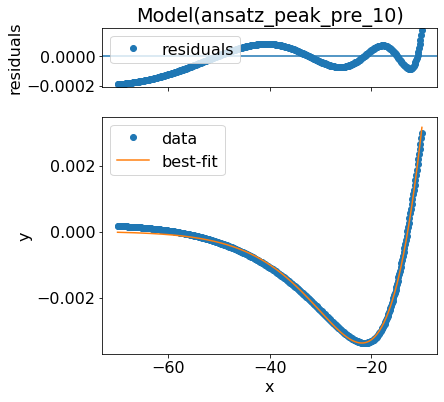

In [210]:
result2 = model.fit(data=y_fit2, x=x_fit2, params=p, method='least_squares', nan_policy='omit')
lmfit.report_fit(result2)
result2.plot()

# stich

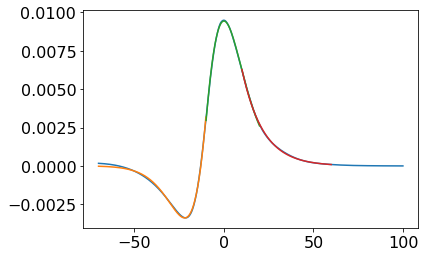

In [211]:



plt.figure()

mask = (x>=-70) & (x<=100)
plt.plot(x[mask], y[mask])

plt.plot(x_fit2, result2.eval(params=result2.params, x=x_fit2))
plt.plot(x_fit, result.eval(params=result.params, x=x_fit))
plt.plot(x_fit3, result3.eval(params=result3.params, x=x_fit3))


# plt.yscale('log')

In [213]:
?phenom.planck_taper

Signature: phenom.planck_taper(tlist, t1, t2)
Docstring:
tlist: array of times
t1. for t<=t1 then return 0
t2. for t>=t2 then return 1
else return 1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1)
File:      ~/anaconda3/envs/wispy-dev/lib/python3.7/site-packages/phenom/utils/utils.py
Type:      function


In [ ]:
tmid = -70
sigma = 10
t1 = tmid - sigma
t2 = tmid + sigma

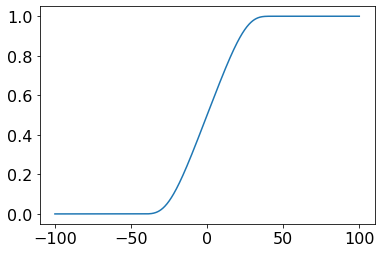

In [217]:
xnew = np.linspace(-100, 100, 1000)
t1 = -50
t2 = 50
plt.figure()
plt.plot(xnew, phenom.planck_taper(xnew, t1, t2))

In [ ]:
window = from 0,1
ins(x) * (window(x)) + orange(x) * (1-window(x))

# pre -10M 

In [366]:
def ansatz_pre(x, a1, a2, a3 ,om, a4, a5):
    return a1 + (a2 + a4*x + a5*x**2)*np.cos(om*x + a3)

In [401]:
# data to fit
t1 = -900
t2 = -400

mask = (x>=t1) & (x<=t2)
sc = 1e-4
x_fit = x[mask]
y_fit = y[mask]/sc

model = lmfit.Model(ansatz_pre)

model.set_param_hint('a1', value=1)
model.set_param_hint('a2', value=0.2)
model.set_param_hint('a3', value=1)
model.set_param_hint('om', value=0.03)

model.set_param_hint('a4', value=1)
model.set_param_hint('a5', value=0.1)

p = model.make_params()

In [402]:
# result = model.fit(data=y_fit, x=x_fit, params=p, method='Nelder', nan_policy='omit')
result = model.fit(data=y_fit, x=x_fit, params=p, method='least_squares', nan_policy='omit')

In [403]:
lmfit.report_fit(result)

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 36
    # data points      = 3472
    # variables        = 6
    chi-square         = 6.83889832
    reduced chi-square = 0.00197314
    Akaike info crit   = -21618.0719
    Bayesian info crit = -21581.1570
##  Warning: uncertainties could not be estimated:
    a5:  at initial value
[[Variables]]
    a1: -0.00740580 (init = 1)
    a2:  0.38301810 (init = 0.2)
    a3: -5.00161607 (init = 1)
    om:  0.02109470 (init = 0.03)
    a4:  5.5519e-04 (init = 1)
    a5:  0.10000000 (init = 0.1)


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

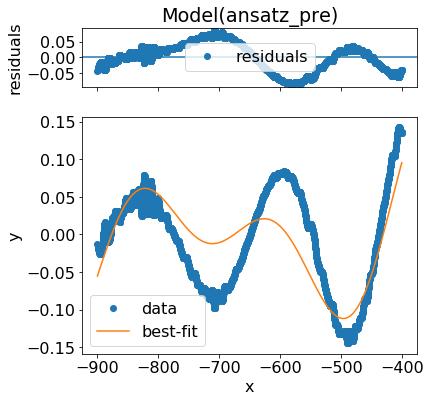

In [404]:
result.plot()